In [56]:
import pandas as pd
import numpy as np
from scipy import stats
import os
from sklearn.linear_model import LinearRegression

In [57]:
os.chdir(r'C:\Users\amykm\Desktop\job_search\intern\OA')

In [58]:
df1 = pd.read_csv('test_data.csv')
df2 = pd.read_csv('test_assignment.csv')

In [59]:
df1.head()

,id,state,quality.metric.pre.test,quality.metric.post.test
0,preeconomical_burro,MD,404.796719,474.967828
1,wellblacked_halicore,RI,397.455717,375.662024
2,leading_owlbutterfly,NV,494.344950,564.922933
3,patterned_chital,WY,548.908591,607.383802
4,descendent_smew,NC,651.467561,684.644834


In [60]:
df2.head()

,id,test.label
0,lopsided_xenotarsosaurus,A
1,thirsty_boilweevil,A
2,oceangoing_brownbutterfly,A
3,unanimated_nutcracker,B
4,unacademic_gecko,B


In [61]:
df1 = df1.merge(df2, on = 'id')
df1.head()

,id,state,quality.metric.pre.test,quality.metric.post.test,test.label
0,preeconomical_burro,MD,404.796719,474.967828,A
1,wellblacked_halicore,RI,397.455717,375.662024,B
2,leading_owlbutterfly,NV,494.344950,564.922933,A
3,patterned_chital,WY,548.908591,607.383802,A
4,descendent_smew,NC,651.467561,684.644834,B


In [62]:
df1['id'].nunique()

1000

In [63]:
df1['diff'] = df1['quality.metric.post.test'] - df1['quality.metric.pre.test']
df1 = pd.concat([df1, pd.get_dummies(df1['test.label'], drop_first=False)], axis=1)

In [64]:
df1.drop(['B'],axis=1,inplace=True)

In [65]:
df1 = pd.concat([df1, pd.get_dummies(df1['state'], drop_first=True)], axis=1)

In [66]:
df1['constant'] = 1
df1.head()

,id,state,quality.metric.pre.test,quality.metric.post.test,test.label,diff,A,AL,AR,AZ,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,constant
0,preeconomical_burro,MD,404.796719,474.967828,A,70.171109,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,wellblacked_halicore,RI,397.455717,375.662024,B,-21.793693,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,leading_owlbutterfly,NV,494.344950,564.922933,A,70.577983,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,patterned_chital,WY,548.908591,607.383802,A,58.475210,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,descendent_smew,NC,651.467561,684.644834,B,33.177273,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [67]:
A = df1[df1['A']==1]['diff']
B = df1[df1['A']==0]['diff']
print(np.mean(A) - np.mean(B))
stats.ttest_ind(A,B,equal_var=False)

-7.963315848460798


Ttest_indResult(statistic=-2.3921489242022904, pvalue=0.016934424770099005)

### Linear regression with state fixed effects

In [68]:
x = df1.loc[:, 'A':'constant']
y = df1['diff']

lm = LinearRegression()
lm.fit(x,y)

print(lm.coef_, lm.intercept_)

[ -7.96331585  -6.16211136  11.06603135  -8.90698171  13.2155479
  -6.03928572  -5.94421305  -4.18536663  -8.87575884   0.54332083
 -21.95516189  -4.2298359    7.96933009 -12.79539994  -9.7015676
 -18.99929304 -10.42544271  -0.39335123   1.31519181   4.36673807
   5.28235826  14.48449032 -20.6318348  -11.91822723 -20.48819291
  -8.19387585   7.98603443 -22.2848081    4.23886437  -0.67342241
   3.93625641 -11.19251414   2.49818357   0.77517279 -23.67699051
  -8.92261608 -29.90074383 -13.73183894  -6.94911733 -19.28097996
  15.71482934   3.01127747   0.24217496   2.71966764  -7.67604729
  -4.23507548 -26.52561568 -11.66202826  11.99565631 -10.86846154
   0.        ] 36.72322067821878


In [69]:
import statsmodels.api as sm

In [70]:
ols = sm.OLS(y,x).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9873
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.500
Time:                        01:01:55   Log-Likelihood:                -5358.8
No. Observations:                1000   AIC:                         1.082e+04
Df Residuals:                     949   BIC:                         1.107e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
A             -7.9633      3.338     -2.386      0.0

<Figure size 1080x288 with 0 Axes>

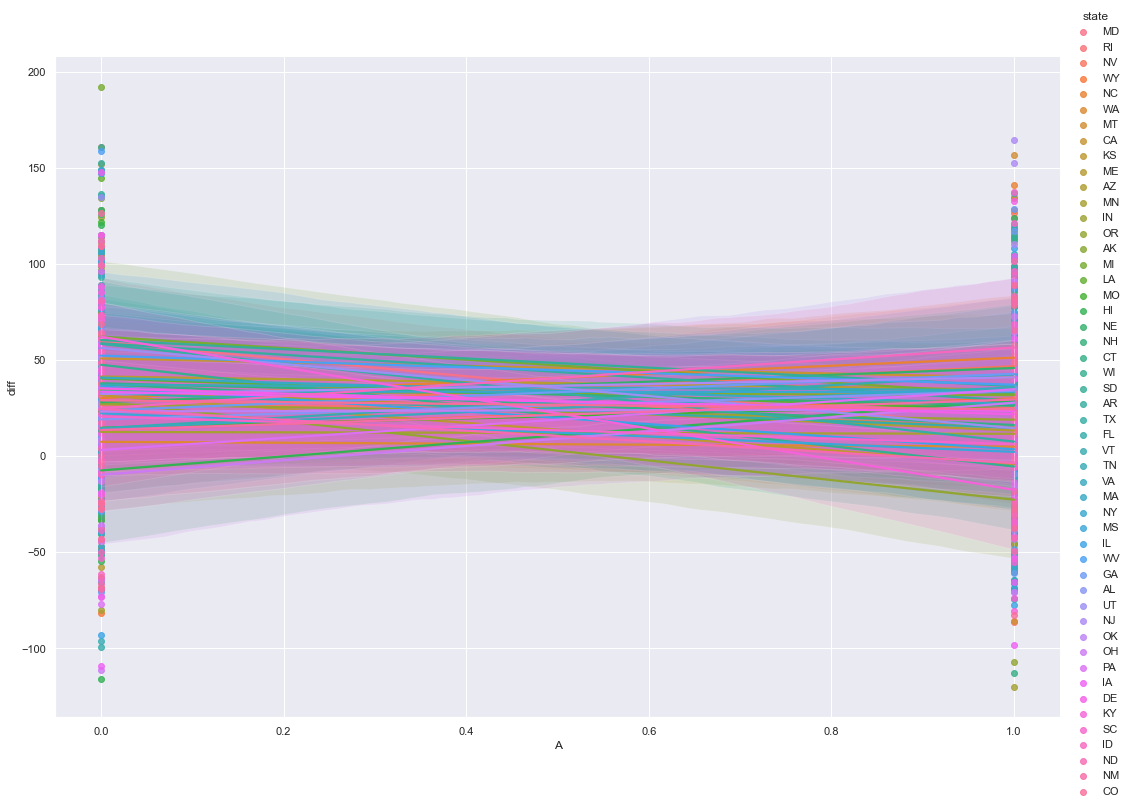

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

x = df1['A']
y = df1['diff']

#plt.scatter(np.ones(len(df1)), df1['quality.metric.post.test'])
#plt.scatter(-1*np.ones(len(df1)), df1['quality.metric.pre.test'])
plt.figure(figsize=(15,4))
sns.set(rc={'figure.figsize':(15,4)})

sns.lmplot(data=df1,x='A',y='diff',hue='state', height=10, aspect=1.5)

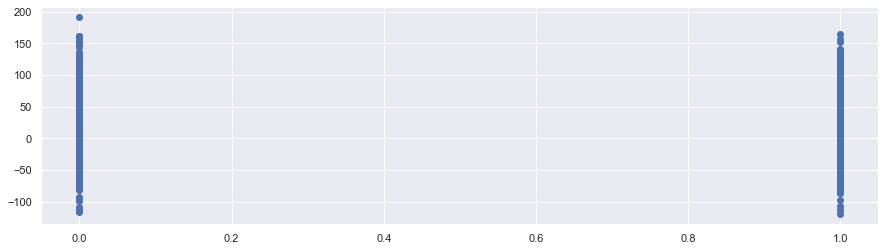

In [79]:
plt.scatter(x,y)
plt.show()